**【問題1】断面図の作成**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
csv_path = "/content/drive/My Drive/Data/mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


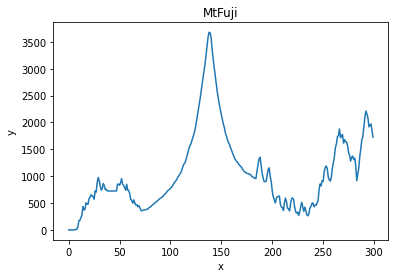

In [7]:
import matplotlib.pyplot as plt

plt.xlabel("x")
plt.ylabel("y")
plt.title("MtFuji")

plt.plot( fuji[:,0],fuji[:,3] )

**【問題2】ある地点の勾配を計算する関数を作成**

In [17]:
def compute_gradient(position, elevations):

    return elevations[position] - elevations[position-1]

In [18]:
position = 136
fuji_elevations = fuji[:, 3]
print("{}番地点の勾配：{}".format(position, compute_gradient(position, fuji_elevations)))

136番地点の勾配：168.35000000000036


**【問題3】移動先の地点を計算する関数を作成**

In [19]:
def compute_next_position(position, elevations, alpha=0.1):

    next_position = position - alpha*compute_gradient(position, elevations)
    next_position = np.maximum(1, next_position) 
    next_position = np.minimum(len(elevations)-1, next_position)
    next_position_int = np.round(next_position).astype(np.int)
    return next_position_int

In [20]:
position = 136
fuji_elevations = fuji[:, 3]

next_position = compute_next_position(position , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(position, next_position))

136番地点の次に移動する地点：119


**【問題4】山を下る関数を作成**

In [21]:
def descend_mountain(start_position, elevations, alpha=0.1):

    positions = [start_position]
    while positions[-1] not in positions[:-1]:
        positions.append(compute_next_position(positions[-1], elevations, alpha=alpha))

    return positions[:-1]


In [22]:
start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mountain(start_position, fuji_elevations, alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(descended_list))

山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


**【問題5】下山過程の可視化**

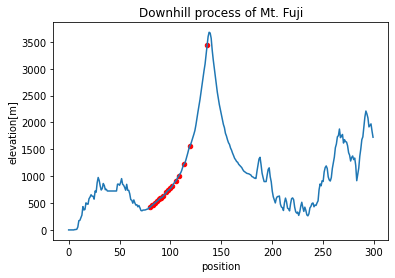

In [23]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 断面図の中に移動した地点を点で表示する
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()

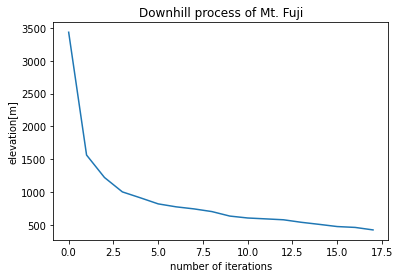

In [24]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

plt.plot(descended_elevations)
plt.show()

**【問題6】初期値の変更**

In [26]:
descended_lists = []
for i, start_position in enumerate(range(1, 300)):
    descended_lists.append(descend_mountain(start_position, fuji[:, 3], alpha=0.2))

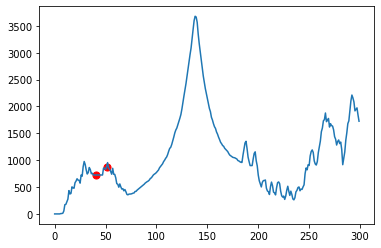

In [32]:
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[50], fuji[:, 3][descended_lists[50]], 50, color='red')
plt.show()